In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range

# Setup Pandas
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
reviews = pd.read_csv('reviews.csv')

In [4]:
reviews.drop('Unnamed: 0', axis = 1, inplace = True)

Looking through the data, I found that some reviews repeat themselves for the apps. So I'll drop any duplicates if the App and the Translated Review is the same 

In [5]:
reviews.drop_duplicates(subset=['App','Translated_Review'],inplace = True, )

In [6]:
reviews['Translated_Review'] = [s.lower() for s in reviews['Translated_Review']]

In [7]:
reviews[690:700]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
971,8 Ball Pool,would better 8 ball break win rather spotted b...,Positive,0.525000,0.325000
972,8 Ball Pool,it always makes winner opponent network issue....,Negative,-0.800000,0.900000
973,8 Ball Pool,loved game until i update. now open even allow...,Negative,-0.009821,0.607143
974,8 Ball Pool,it's pretty good game i noticed need pay way m...,Positive,0.190000,0.480000
975,8 Ball Pool,spins nd purchases r rigged developer. the scr...,Positive,0.186667,0.513333
976,8 Ball Pool,"ever since i updated, i've losing games time r...",Negative,-0.236458,0.508333
977,8 Ball Pool,fun game cue upgrades little things take beyon...,Negative,-0.057500,0.460000
978,8 Ball Pool,sir new update awesome u solve issues issue pl...,Positive,0.409091,0.505303
979,8 Ball Pool,great addictive game... one thing guys improve...,Positive,0.100000,0.662500
980,8 Ball Pool,lovely game. with lovely graphics controls. if...,Positive,0.121429,0.621429


In [8]:
labels = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1\
         ,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1\
         ,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1\
         ,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,1,0,0,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,0,1\
         ,0,1,1,1,0,1,0,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\
         ,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1\
         ,1,1,1,1,1,1,1,0,0,1,1,0,0,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1\
         ,1,1,1,0,1,1,0,1,1,1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1\
         ,1,0,0,1,1,1,1,1,1,1,0,0,0,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0\
         ,1,1,0,1,0,0,1,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1\
         ,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1\
         ,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1\
         ,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1\
         ,1,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0\
         ,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1\
         ,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,1,0,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1\
         ,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1\
         ,1,1,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1]

In [9]:
with_labels = reviews[0:700]

In [10]:
with_labels['Label'] = labels

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
with_labels.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label
0,10 Best Foods for You,i like eat delicious food. that's i'm cooking ...,Positive,1.00,0.533333,1
1,10 Best Foods for You,this help eating healthy exercise regular basis,Positive,0.25,0.288462,1
2,10 Best Foods for You,works great especially going grocery store,Positive,0.40,0.875000,1
3,10 Best Foods for You,best idea us,Positive,1.00,0.300000,1
4,10 Best Foods for You,best way,Positive,1.00,0.300000,1


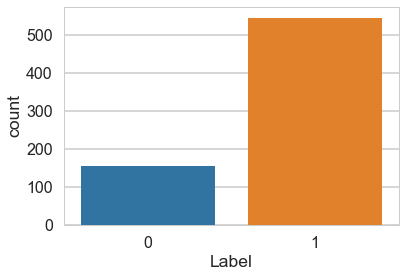

In [12]:
_ = sns.countplot(x = 'Label', data = with_labels) 

Generally, there is said to be a class imbalance if there is a 10 to 1 ratio for one of the classes, but as you can see above, that is not the case in this dataset.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
import nltk
from nltk import word_tokenize 
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

In [18]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\miste\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [20]:
vectorizer = CountVectorizer(tokenizer= LemmaTokenizer())
X = vectorizer.fit_transform(with_labels.Translated_Review)
X = X.tocsc()  
y = with_labels.Label.values.astype(np.int)

In [21]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
X.shape

(700, 2374)

In [23]:
word_counts = np.count_nonzero(X.toarray(), axis = 0)

In [24]:
np.sort(word_counts)

array([  1,   1,   1, ..., 197, 243, 346], dtype=int64)

In [25]:
from collections import Counter
c = (Counter(np.sort(word_counts))) #1372 words show up once. 339 words show up twice. etc. 
list(c.items())[:10]

[(1, 1329),
 (2, 338),
 (3, 175),
 (4, 99),
 (5, 68),
 (6, 59),
 (7, 42),
 (8, 36),
 (9, 26),
 (10, 19)]

In [26]:
z = list(reversed(np.sort(list(Counter(np.sort(word_counts)).values()))))

In [27]:
def add_one_by_one(l):
    new_l = []
    cumsum = 0
    for elt in l:
        cumsum += elt
        new_l.append(cumsum)
    return new_l

In [28]:
add_z = [x/X.shape[1] for x in add_one_by_one(z)]
add_z
y_z = np.arange(1, len(add_z)+1) 

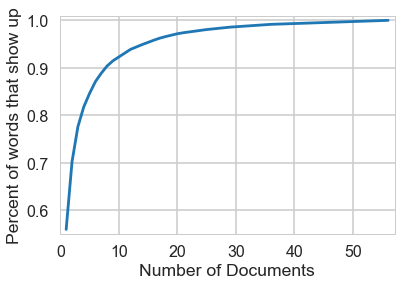

In [29]:
_ = plt.plot(y_z,add_z)
_ = plt.xlabel('Number of Documents')
_ = plt.ylabel('Percent of words that show up')
_ = plt.margins(0.02)


In [30]:
best_min_df = 5

In [31]:
vectorizer = CountVectorizer(min_df=best_min_df, stop_words= 'english')
X = vectorizer.fit_transform(with_labels.Translated_Review)
X = X.tocsc()  # some versions of sklearn return COO format
y = with_labels.Label.values.astype(np.int)

In [138]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:
multi = MultinomialNB()

In [46]:
multi.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
y_pred = multi.predict(X_test)
np.sum(np.abs(y_pred - y_test)) 

39

In [48]:
multi.score(X_test, y_test)

0.8142857142857143

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

In [51]:
tn, fp, fn, tp

(17, 24, 15, 154)

In [52]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8651685393258427 Recall =  0.9112426035502958


The precision and recall are pretty good. 

#### Trying Bernoulli, Logistic Regression, Gaussian NB, and SGD Classifiers to make ensemble

In [73]:
bern = BernoulliNB()
bern.fit(X_train,y_train)
y_pred = bern.predict(X_test)
np.sum(np.abs(y_pred - y_test)) 

43

In [74]:
bern.score(X_test, y_test)

0.7952380952380952

In [75]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
tn, fp, fn, tp

(15, 26, 17, 152)

In [76]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8539325842696629 Recall =  0.8994082840236687


In [141]:
GNB = GaussianNB()
GNB.fit(X_train.toarray(),y_train)
y_pred = GNB.predict(X_test.toarray())
np.sum(np.abs(y_pred - y_test)) 

81

In [145]:
GNB.score(X_test.toarray(), y_test)

0.6142857142857143

In [146]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
tn, fp, fn, tp

(27, 14, 67, 102)

In [147]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8793103448275862 Recall =  0.6035502958579881


In [176]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [177]:
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
np.sum(np.abs(y_pred - y_test)) 

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


37

In [178]:
LR.score(X_test, y_test)

0.8238095238095238

In [179]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
tn, fp, fn, tp

(12, 29, 8, 161)

In [180]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8473684210526315 Recall =  0.9526627218934911


In [181]:
SGD = SGDClassifier()
SGD.fit(X_train,y_train)
y_pred = SGD.predict(X_test)
np.sum(np.abs(y_pred - y_test)) 

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


47

In [182]:
SGD.score(X_test, y_test)

0.7761904761904762

In [183]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
tn, fp, fn, tp

(18, 23, 24, 145)

In [184]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8630952380952381 Recall =  0.8579881656804734


### Now, I have 5 different classifiers. I will merge these algorithms together and put it to a vote

In [105]:
from sklearn.ensemble import VotingClassifier
    

In [199]:
voted_class = VotingClassifier(estimators=[('MNB', multi),('Bern', bern),('Gauss',GNB),('Logreg',LR),('SGD',SGD)])

In [221]:
smote = SMOTE(ratio = 'minority')

In [39]:
X_sm, y_sm = smote.fit_sample(X, y) #I now have equal amount of 1s and 0s. 

In [222]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 42)

In [225]:
voted_class.fit(X_sm_train.toarray(), y_sm_train)

C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\miste\Miniconda3\envs\py36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


VotingClassifier(estimators=[('MNB', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)), ('Bern', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)), ('Gauss', GaussianNB(priors=None, var_smoothing=1e-09)), ('Logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercep...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [226]:
voted_class.score(X_sm_test.toarray(),y_sm_test)

0.8593272171253823

In [228]:
y_sm_pred = voted_class.predict(X_sm_test.toarray())

In [229]:
tn, fp, fn, tp = confusion_matrix(y_sm_test, y_sm_pred).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
tn, fp, fn, tp

(143, 22, 24, 138)

In [230]:
print ("Precision = ", precision, "Recall = ", recall)

Precision =  0.8625 Recall =  0.8518518518518519


In [231]:
X_full = vectorizer.transform(reviews['Translated_Review'])

In [232]:
y_pred_full = voted_class.predict(X_full.toarray())

In [233]:
np.sum(y_pred_full == 0)

7416

In [234]:
np.sum(y_pred_full == 1)

22276

I predict around 25,000 1s and 4,000 0s, which is around the same ratio that I labeled them at. 

### Now, I am going to add a Label column with my prediction and visually inspect how it did

In [235]:
rev = reviews.copy()

In [236]:
rev['Label'] = y_pred_full

In [237]:
len(rev.loc[rev['Sentiment'] == 'Negative'].loc[rev['Label'] == 1])

3982

Around 3982 labels don't match up with the negative sentiments that they found. 

In [238]:
len(rev.loc[rev['Sentiment'] == 'Negative'].loc[rev['Label'] == 0])

2339

Only about 1/3 of my negative labels match up with the negative labels that they used

In [239]:
len(rev.loc[rev['Sentiment'] == 'Positive'].loc[rev['Label'] == 1])

16708

17,000 of my guesses match with theirs. 

In [240]:
len(rev.loc[rev['Sentiment'] == 'Positive'].loc[rev['Label'] == 0])

2307

Almost 2300 are labeled as negative for me, but positive for them. 

Let's look at some of these differences and decide which one is better. 

In [241]:
rev.loc[rev['Sentiment'] == 'Positive'].loc[rev['Label'] == 0]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label
16,10 Best Foods for You,one greatest apps.,Positive,1.000000,1.000000,0
23,10 Best Foods for You,because i found important.,Positive,0.400000,1.000000,0
30,10 Best Foods for You,absolutely fabulous phenomenal,Positive,0.450000,0.750000,0
57,10 Best Foods for You,very informative,Positive,0.200000,0.300000,0
60,10 Best Foods for You,wonderful,Positive,1.000000,1.000000,0
62,10 Best Foods for You,weight loss not bad,Positive,0.350000,0.666667,0
64,10 Best Foods for You,this needed most.,Positive,0.500000,0.500000,0
87,10 Best Foods for You,wow,Positive,0.100000,1.000000,0
219,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,this better suited possibly somebody understan...,Positive,0.233333,0.600000,0
238,11st,top bar missing newest update. hard shop can't...,Positive,0.002778,0.363889,0


In [218]:
rev.loc[rev['Sentiment'] == 'Negative'].loc[rev['Label'] == 1]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Label
29,10 Best Foods for You,no recipe book unable recipe book.,Negative,-5.000000e-01,0.500000,1
82,10 Best Foods for You,crap doesn't work,Negative,-8.000000e-01,0.800000,1
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,"not bad, price little bit expensive",Negative,-1.125000e-01,0.622222,1
234,11st,horrible id verification,Negative,-1.000000e+00,1.000000,1
239,11st,there is nothing missing ~ !!!,Negative,-3.906250e-01,0.050000,1
249,11st,icon name is strange after updating,Negative,-5.000000e-02,0.150000,1
302,1800 Contacts - Lens Store,"first time app, always used doctors office sta...",Negative,-1.250000e-01,0.516667,1
358,1LINE – One Line with One Touch,amaze i'm addicted,Negative,-4.000000e-01,0.600000,1
359,1LINE – One Line with One Touch,i like game,Negative,-4.000000e-01,0.400000,1
360,1LINE – One Line with One Touch,i play game,Negative,-4.000000e-01,0.400000,1


By looking at both of the dataframes where the negatives were not matching with the original, we can see that there is no definite answer for which nlp worked better. Sometimes I predicted the negative class correctly and they don't, and sometimes they predict the negative class correctly, while I don't.

I think it may have been a bit difficult to predict these things because the reviews were translated from a different language. There are also many misspellings like "gud" or repeated letters to exageratted like "Soooo gooood" 

In order to make this project more "my own", I will use my predictions as I continue.

In [242]:
rev.to_csv('with_labels.csv')